In [1]:
import numpy as np
import matplotlib.pyplot as plt

Topic: 
 
Assume that a satellite orbiting Earth is affected not only by Earth's gravitational force, but also a weak solar wind of magnitude W. Assume the solar wind is constant in magnitude and direction. Choose initial conditions for the satellite such that if W=0, the orbit is circular. The magnitude of W should be about 1% of the gravitational force in a circular orbit.

1.Introduction:

<img src="https://s4.uupload.ir/files/screen_shot_2021-12-08_at_1.34.58_pm_uaqn.png" width=300 height=300 />

In this system, the satellite is orbiting around Earth under gravitational force exerted by earth. The magnitude of the gravitational force depends only on separation of satelite and earth ($r$) where $r=R_E+h$ or in other words, I'm taking the center of mass of the earth to be the origin in my coordinate system. Magnitude and direction of W is assumed to be constant and W can be the solar particle wind resulting from the stream of charged particles released from the upper atmosphere of the sun. The direction of the gravitational force is along the line joinig the masses so the gravitational force can be thought of as a central force. Hence, The orbit of satellite is restricted to a plane (x-y). So, the angular momentum of the satellite would lie in z direction. Since the satellite is very small compared to earth, we can treat the system as a two body system with earth being fixed and neglect the effect of nearby planets and sun on the orbit. So, we're only considering the effects of a constant force field (solar wind) perurbing a classical inverse-square-law orbit. 

<img src="http://ww2.odu.edu/~agodunov/teaching/phys420/files/solarwind2.gif" width=200 height=200 />

The picture above shows a circular orbit which is our initial condition when W=0. Note that a classical inverse-square law gives rise to an elliptical orbit in which the motion is faster near the focus contianing the force center (earth) and slower at the opposite end of the ellipse. 


2.Theory:

To track the satellites motion with respect to earth, which we are treating as a fixed object with it's center of mass as the origin of our coordinate system, we need to derive satellite's equations of motion in cartesian coordinate so we can plot the trajectory of the satellite. 
<img src="https://s4.uupload.ir/files/screen_shot_2021-12-08_at_12.17.27_pm_b9d4.png" width=400 height=400 />
The gravitational force acting on the satellite can be written as:

$\vec{F_g}=\frac{-GMm}{r^2}\hat{r}$ 

Note that as we stated in introduction, this force is in opposite direction of r (negative sign means its attractive). Also, in this equation, M is the mass of earth ($M=5.972\times10^{24} kg$) and m is the mass of the satellite. $G=6.67\times10^{-11} \frac{m^3}{kg s^2}$ is the gravitational constant. $\vec{r}=|r|\hat{r}$ so we can rewrite the above equation as:

$\vec{F_g}=\frac{-GMm}{r^3}\vec{r}$ 

Then we consider Newton's second law $F=ma$ for the system, here I'm not accounting for W yet but I'll do so when I'll convert to cartesian coordinates so we can have W along the x axis or the y axis.

$m\frac{d^2\vec{r}}{dt^2}=\frac{-GMm}{r^3}\vec{r}$

Which reduces to:

$\frac{d^2\vec{r}}{dt^2}=\frac{-GM}{r^3}\vec{r}$

We then use the diagram above to divide up $F_g$ to two perpendicular components $F_x$ and 
$F_y$, remember that $cos(\theta)=\frac{x}{r}$ and $sin(\theta)=\frac{y}{r}$:

$|F_x|=|F_g|cos(\theta)=\frac{-GMm}{r^2}cos(\theta)=\frac{-GMm}{r^3}x$

$|F_y|=|F_g|sin(\theta)=\frac{-GMm}{r^2}sin(\theta)=\frac{-GMm}{r^3}y$

Similarly, we can use $F=ma$ for these equations to acheive the equations of motion in cartesian coordinate system, I'm assuming that the wind is constant in direction of $+\hat{i}$ for the equations below, so force from the wind is $\vec{w}=|w|\hat{i}$:

$m\frac{d^2 x}{dt^2}\hat{i}=\frac{-GMm}{r^3}x \hat{i}+|w|\hat{i}$

$m\frac{d^2 y}{dt^2}\hat{i}=\frac{-GMm}{r^3}y \hat{i}$

Next I divide the first equation by m, and assume $\frac{|w|}{m}=|w|$ as wind's force is constant. so we have our simplified equations of motions as:

$\frac{d^2 x}{dt^2}=\frac{-GM}{r^3}x +|w|$

$\frac{d^2 y}{dt^2}=\frac{-GM}{r^3}y$

Where $r=\sqrt{x^2+y^2}$. I then implement numerical methods to solve these ODEs given our initial condition. Using these equations we're assuming the wind's force to be in $+\hat{i}$ direction. Additionaly, we're narrowing down the problem to the restricted case in which the direction of the uniform force lies in the plane of the unperturbed orbit (x-y). Note that I have $|w|$ instead of $\frac{|w|}{m}$ in the equation above, this is not important as in determining winds magnitude we'll be plugging in 1% of the gravitational force in a circular orbit (see next section), so at the end we'll have $\frac{|w|}{m}$ plugged in istead of $|w|$ on its own. 

The unperturbed motion has the same equations of motion in cartiesian coordinates and only lacks the term $|w|$, and we know that the solution to unperturbed case gives rise to an elliptical orbit. So, we're investigating how $|w|$ term changes the solution to the original case. For this problem, we're assuming a circular orbit when $|w|=0$ as our initial condition. So, we're considering a circular orbit for the orginal unperturbed equations of motion. 

3.Methods:

To solve our two second order equations of motion, we need to reduce each to a system of two first order equations of the form:

$\frac{u_1}{dt}=f_1(t,u_1,u_2)$
and
$\frac{u_2}{dt}=f_2(t,u_1,u_2)$

with initial conditions $u_1(a)=a_1$ and $u_2(a)=a_2$. 

For $\frac{d^2 x}{dt^2}=\frac{-GM}{r^3}x +|w|$ I let $x(t)=u_1(t)$ and $\frac{d x(t)}{dt}=u_2$, then:

$\frac{d x(t)}{dt}=\frac{d u_1}{dt}=u_2$ and $\frac{d^2 x(t)}{dt^2}=\frac{d u_2}{dt}=\frac{-GM}{r^3}x +|w|$

So, our system of equations according to section 5.9 of the textbook is:

$u_1'(t)=u_2(t)$ 

$u_2'(t)=\frac{-GM}{r^3}x +|w|$

Our initial conditions would be $u_1(0)=x(0)$ and $u_2(0)=x'(0)=v_y(0)$, remember that we're assuming a circular orbit initially when (W=0). In a circular orbit the gravitational 
acceleration would be that of a centripetal acceleration ($a=\frac{v_0^2}{r_0})$. Hence by Newton's 2nd law:

$m\frac{v_0^2}{r_0}=\frac{GMm}{r_0^2}$

Rearranging this we can find the initial velocity as: 

$v_0=\sqrt{\frac{GM}{r_0}}$

Also we need to notice that in a circular orbit the velocity is tangential to the orbit so $v_0\perp r_0$. I want to start tracking the trajectory of the satellite when it crosses the x-axis like the image below:

<img src="https://s4.uupload.ir/files/img_0170_oh9.jpg" width=300 height=150 />

Then the initial positions are $x_0=x(0)=r_0$ and $y_0=y(0)=0$.

The initial velocity would be all in y direction, so $v_x(0)=0$ and $v_y(0)=v_0=\sqrt{\frac{GM}{r_0}}$. The direction of the orbit then would be counter clock wise by this assumption.

So, our initial conditions for the first set of equations above are $u_1(0)=r_0$ and $u_2(0)=0$.

Similary, for the equation of motion in the y direction we can find functions $s_1(t)$ and $s_2(t)$ to write the 2nd order ODE as 2 first order equations. In this case, I let $s_1(t)=y(t)$ and $s_2(t)=\frac{d y(t)}{d t}$:

$\frac{d y(t)}{dt}=\frac{d s_1}{dt}=s_2$

$\frac{d^2 y(t)}{dt^2}=\frac{ds_2}{dt}=\frac{-GM}{r^3}y$

So our 2 first order equations for $s_1$ and $s_2$ in this case are:

$s_1'(t)=s_2(t)$

$s_2'(t)=\frac{-GM}{r^3}y$

With initial conditions, $s_1(0)=y(0)=0$ and $s_2(0)=y'(0)=v_y(0)=\sqrt{\frac{GM}{r_0}}$.

We're interested in the trajectory of the satellite so I need to plot $s_1(t)$ vs $u_1(t)$ after solving these systems of equations. Simple methods like Euler, and modified Euler need a very small time-step, and thus a large amount of computing time, to remain stable. Hence, a more complex method is necessary to increase accuracy and reduce calculation time.
I'm using 4-th order Runge Kutta method (local truncation error $O(h^4)$) for systems of equations which is the generalization of the method for a single first-order equation to solve these 2 systems.

The definition of the RK4 method for a single initial value problem y' =f(t,y) with initial condition $w_0=\alpha$ is $w_{i+1}=w_i+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$ for each time step. Using N intervals in $[a,b]$ ,i=0,1,..N-1 and time step=$h=\frac{b-a}{N}$, the algorithm can calculate the value of a function y at a time $t_i$ as $y(t_i)=w_i$. 

The coefficients $k_1$, $k_2$, $k_3$ and $k_4$ are defined for each time-step as:
$k_1=hf(t_i,w_i)$
$k_2=hf(t_i+\frac{h}{2},w_i+\frac{1}{2}k_1)$
$k_3=hf(t_i+\frac{h}{2},w_i+\frac{1}{2}k_2)$
$k_4=hf(t_{i+1},w_i+k_3)$

These coefficients indicate the slope of the function at three points in the time interval: the beginning, the mid-point and the end. The slope at the midpoint is estimated twice, first using the value of $k_1$ to determine $k_2$, next using the value of $k_2$ to compute $k_3$.
Knowing the k-coefficients, the solution at the next time step can be computed.

The generalization of this method for a system of equations uses $w_{ji}$ for each time step i $t_i=a+ih$ for each equation j ($j=1,2$ in our case). So, $w_{ji}$ approximates the jth solution ($u_j(t)$) at the ith mesh point, or in other words $w_{ji}$ approximates $u_j(t_i)$. So, for example, we have to evaluate j $k_1$ (one for each equation). it's important to note that for all $k_1$ coeffients need to be calculated for all equations before a $k_2$ coefficeint can be calculated.

Initial condition for each equations are then in fact:

$w_{1,0}$ and $w_{2,0}$ and so on for each equation.

Then the next steps are calculated by an inductive process, for example having $w_{1,i}$ and $w_{2,i}$ values in our case, we can calculate the next time step for each equation ($u_1(t_{i+1})=w_{1,i+1}$ and $u_2(t_{i+1})=w_{2,i+1}$) by calculating:

$k_{1,j}=hf_j(t_i,w_{1,i},w_{2,i})$ for j=1,2 in our case (2 eqs)

next calculating:

$k_{2,j}=hf_j(t_i+\frac{h}{2},w_{1,i}+\frac{1}{2}k_{1,1},w_{2,i}+\frac{1}{2}k_{1,2})$ for j=1,2 

then calculating:

$k_{3,j}=hf_j(t_i+\frac{h}{2},w_{1,i}+\frac{2}{1}k_{1,1},w_{2,i}+\frac{1}{2}k_{2,2})$ for j=1,2 

and then:

$k_{4,j}=hf_j(t_i+h,w_{1,i}+\frac{1}{2}k_{3,1},w_{2,i}+\frac{1}{2}k_{3,2})$ for j=1,2 

after we calculated all these coefficients for all equations we calculate each function's value at the next time step as:

$w_{j,i+1}=w_{j,i}+\frac{1}{6}(k_{1,j}+2k_{2,j}+2k_{3,j}+k_{4,j})$

in our case we're approximating 2 functions at each time step $x(t)=u_1(t)$ and $x'(t)=u_2(t)$ so for each time step we are calculating:

$w_{1,i+1}=w_{1,i}+\frac{1}{6}(k_{1,1}+2k_{2,1}+2k_{3,1}+k_{4,1})$

and

$w_{2,i+1}=w_{2,i}+\frac{1}{6}(k_{1,2}+2k_{2,2}+2k_{3,2}+k_{4,2})$

The implemented algorithm below uses a  N*m 2D array so it has m (m=2 in our case) rows and N columns, the first row of the array then $w[0,:]$ is where j=1, so it gives us the solution to the first eqs and similarly $w[1,:]$ gives the solution to the 2nd equation (values of the functions at different time-steps).

Then for each time-step, all coefficiens for all equations are calculated.

For example,
$k1[j]=hf(t[i-1],w[:,i-1])$ in a loop for j=1,2

As we first set the functions for $u_1$ and $u_2$ so for each j=1,2, the functions would be different for each j. Also, f is a function of both $u_1$ and $u_2$ so I've used $w[:,i-1]$ and in the time loop i starts from 1 to N, so I'm using i-1 for each time-step instead of i. Our two systems of equations that we've defined also depends on W (the magnitude of wind) so I'm passing it as a parameter to both functions. 
I've added similar statements for the 2nd system of eqs in the for loops as we need the x and y values at the same time to be able to calculate the functions f2 and g2 (f2 in the first system also depends on $s_1(t)=y(t)$ from the 2nd system). The algorithm then outputs t array of time-steps and 2D arrays of approximations for both systems of equations (solution to jth eq is in the jth row for each array).

In [2]:
#implementing Runge-Kutta 4 for systems of equations from algorithm 5.7
#and also from class
def RKSystem(a,b,m,N,alphas,betas,xfuncs,yfuncs,Wind):
    '''Inputs: endpints a,b which a<=t<=b
    m is the number of equations
    N is the number of intervals in [a,b] (meshpoints)
    alphas and betas are arrays of initial conditions (for each system of equations)
    xfuncs is an array of the funcs name of the right hand side of the equations we're solving for the 1st system
    yfuncs is an array of the funcs name of the right hand side of the equations we're solving for the 2nd system
    Wind is the magnitude of the solar wind.
    '''
    h=(b-a)/N #step size
    t=np.linspace(a,b,N+1) #array of steps for radius (mesh points)
    #m*N 2D array for solutions so that solution of jth equation is in the jth row
    w=np.zeros((m,len(t))) #2D solution array for x eqs of motion
    W=np.zeros((m,len(t))) #2D solution array for y eqs of motion
    # initializing the k values of RK4
    k1=np.zeros(m) #len is m so k1[j] is the k1 value for jth eq
    k2=np.zeros(m)
    k3=np.zeros(m)
    k4=np.zeros(m)
    # initializing the K values for y component
    K1=np.zeros(m) 
    K2=np.zeros(m)
    K3=np.zeros(m)
    K4=np.zeros(m)
    #setting initial conditions for all m equations for both sets of eqs
    for j in range(0,m):
        w[j,0]=alphas[j]
        W[j,0]=betas[j]
    for i in range(1,N+1): #for all steps calculate kvalues then calculate w
            #since k1[i] for all i from 1 to m need to be calculated before k2 values 
            #we need to have 4 in order loops, so all k1s are calculated in the first loop so we can proceed to the 2nd
        for j in range(0,m): #setting the eqs
            f=xfuncs[j]
            g=yfuncs[j]
            k1[j]=h*f(t[i-1],w[:,i-1],W[:,i-1],Wind) #by this step all k1s are calculated for all equations for a specific step
            K1[j]=h*g(t[i-1],w[:,i-1],W[:,i-1],Wind) #K1s
        for j in range(0,m):
            f=xfuncs[j]
            g=yfuncs[j]
            #x equations: uses w and k
            k2[j]=h*f(t[i-1]+h/2,w[:,i-1]+k1/2,W[:,i-1]+K1/2,Wind) #k2s
            #y equations: uses W and K
            K2[j]=h*g(t[i-1]+h/2,w[:,i-1]+k1/2,W[:,i-1]+K1/2,Wind) #K2s
        for j in range(0,m):
            f=xfuncs[j]
            g=yfuncs[j]
            k3[j]=h*f(t[i-1]+h/3,w[:,i-1]+k2/2,W[:,i-1]+K2/2,Wind) #k3s
            K3[j]=h*g(t[i-1]+h/3,w[:,i-1]+k2/2,W[:,i-1]+K2/2,Wind) #K3s
        for j in range(0,m):
            f=xfuncs[j]
            g=yfuncs[j]
            k4[j]=h*f(t[i-1]+h,w[:,i-1]+k3,W[:,i-1]+K3,Wind) #k4s
            K4[j]=h*g(t[i-1]+h,w[:,i-1]+k3,W[:,i-1]+K3,Wind) #K4s
        for j in range(0,m): #calculate solution at i+1 for all equations (fill a row)
            w[j,i]=w[j,i-1]+(k1[j]+2*k2[j]+2*k3[j]+k4[j])/6
            W[j,i]=W[j,i-1]+(K1[j]+2*K2[j]+2*K3[j]+K4[j])/6

    print("%.15s %.15s %.15s"%("t     ","     x(t)","         y(t)"))
    time=np.zeros(N+1)
    x=np.zeros(N+1)
    y=np.zeros(N+1)
    for q in range(1,N+1):
        time=t[q]
        x[q]=w[0,q]
        y[q]=W[0,q] 
        print ("%.5f %.5f %.5f"%(t[q],x[q],y[q]))
    return(t,w,W)

I'm now defining the first order ODEs I have for each system of equation. So I can simulate the orbit.

In [3]:
G=6.67*(10**(-11))
M=5.972*(10**(24))

#1st system of equation: x component of the motion 
#RHS of the equations I described above like du_1/dt=f1(t,u_1,u_2,,w)
def f1(t,u,s,Wind):
    return u[1]
def f2(t,u,s,Wind):
    return ((-G*M/((u[0]**2+s[0]**2)**(3/2)))*u[0])+Wind

#2nd system of equation: y component of the motion 
def g1(t,u,s,Wind):
    return s[1]
def g2(t,u,s,Wind):
    return (-G*M/((u[0]**2+s[0]**2)**(3/2)))*s[0]

The question says that the magnitude of Wind should be about 1% of the gravitational force in a circular orbit. So, $Wind=\frac{W}{m}=\frac{1}{100}\frac{GM}{r_0^2}$ .

In [4]:
#telecommunication satellites are about 36,000 km from earth
rzero=36000*10**(3)

def vzero(G,M,rzero):
    return np.sqrt(G*M/rzero)
def Wind(G,M,rzero):
    return (1/100)*(G*M/(rzero**(2)))
print("Wind=",Wind(G,M,rzero))

Wind= 0.0030735524691358025


4.To verify my progam, we know that it should result in a circular orbit when $Wind=0$ as the equations would reduce to the unperturbed case and we assumed a circular orbit if $Wind=0$ in our program. So, I'd expect to see a circle when I plot y(t) Vs x(t).

In [5]:
#choosing 0 for the wind
a=0
b=900000
N=10000
(t0,w0,W0)=RKSystem(a,b,2,N,[rzero,0],[0,vzero(G,M,rzero)],[f1,f2],[g1,g2],0)

t           x(t)          y(t)
90.00000 35998755.21842 299370.54634
180.00000 35995020.95978 598720.38984
270.00000 35988797.48230 898028.82912
360.00000 35980085.21638 1197275.16563
450.00000 35968884.76450 1496438.70514
540.00000 35955196.90122 1795498.75913
630.00000 35939022.57313 2094434.64625
720.00000 35920362.89876 2393225.69372
810.00000 35899219.16850 2691851.23878
900.00000 35875592.84453 2990290.63013
990.00000 35849485.56073 3288523.22933
1080.00000 35820899.12254 3586528.41225
1170.00000 35789835.50683 3884285.57048
1260.00000 35756296.86179 4181774.11275
1350.00000 35720285.50678 4478973.46639
1440.00000 35681803.93214 4775863.07872
1530.00000 35640854.79904 5072422.41847
1620.00000 35597440.93932 5368630.97722
1710.00000 35551565.35522 5664468.27081
1800.00000 35503231.21926 5959913.84074
1890.00000 35452441.87396 6254947.25563
1980.00000 35399200.83163 6549548.11256
2070.00000 35343511.77413 6843696.03856
2160.00000 35285378.55262 7137370.69197
2250.00000 35224805.1872

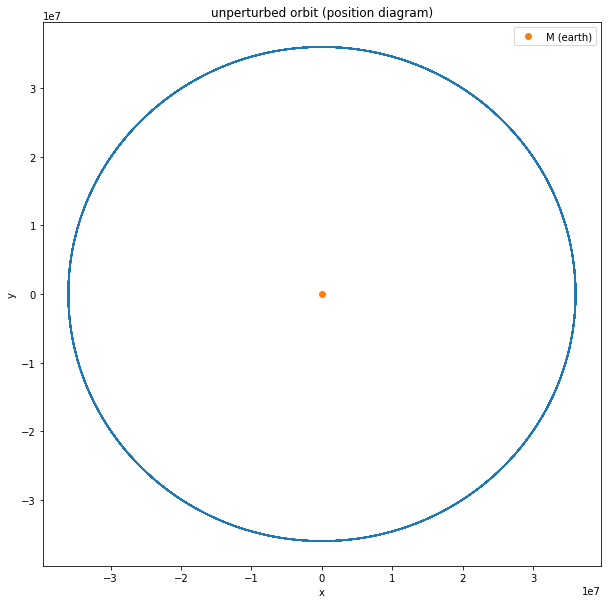

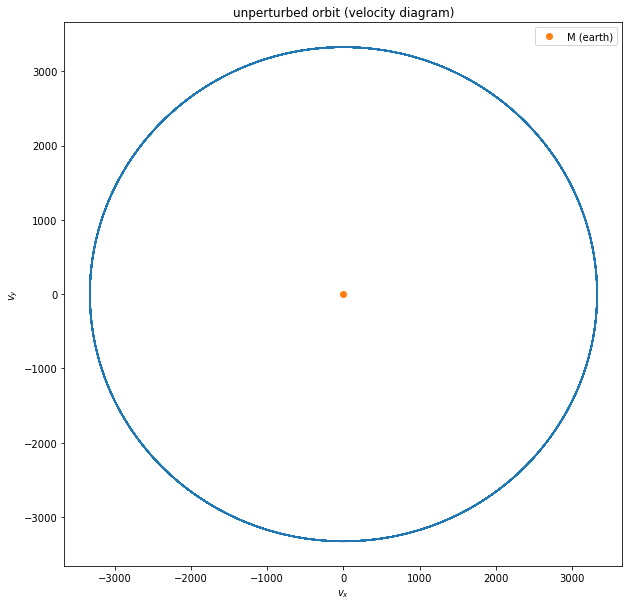

In [6]:
#plotting y vs x (aka solution of the first eq in the 2nd system vs solution of the first eq in the 1st system)
plt.figure(figsize=(10,10))
plt.title("unperturbed orbit (position diagram)")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(w0[0,:],W0[0,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show()
#plotting velocities 
plt.figure(figsize=(10,10))
plt.title("unperturbed orbit (velocity diagram)")
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.plot(w0[1,:],W0[1,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show() 

We get a circle. So, I expect my program to be working correctly.


5.Simulation:

Now I begin my simulation using 1%of the gravitational force in the circular orbit as my Wind size.

In [7]:

#finally simulating our orbit!!!
a=0
b=900000
N=10000
(t,w,W)=RKSystem(a,b,2,N,[rzero,0],[0,vzero(G,M,rzero)],[f1,f2],[g1,g2],Wind(G,M,rzero))

t           x(t)          y(t)
90.00000 35998767.66645 299370.54634
180.00000 35995070.75362 598720.38987
270.00000 35988909.52490 898028.82938
360.00000 35980284.41928 1197275.16673
450.00000 35969196.05127 1496438.70849
540.00000 35955645.21086 1795498.76748
630.00000 35939632.86347 2094434.66428
720.00000 35921160.14983 2393225.72886
810.00000 35900228.38588 2691851.30209
900.00000 35876839.06269 2990290.73731
990.00000 35850993.84628 3288523.40188
1080.00000 35822694.57751 3586528.67874
1170.00000 35791943.27189 3884285.96792
1260.00000 35758742.11939 4181774.68817
1350.00000 35723093.48428 4478974.27842
1440.00000 35684999.90491 4775864.19936
1530.00000 35644464.09344 5072423.93499
1620.00000 35601488.93566 5368632.99413
1710.00000 35556077.49070 5664470.91198
1800.00000 35508232.99075 5959917.25162
1890.00000 35457958.84080 6254951.60557
1980.00000 35405258.61831 6549553.59730
2070.00000 35350136.07290 6843702.88273
2160.00000 35292595.12604 7137379.15178
2250.00000 35232639.8706

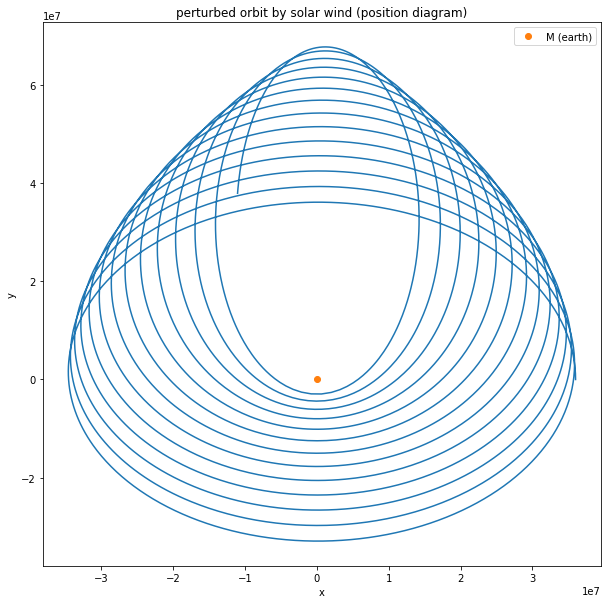

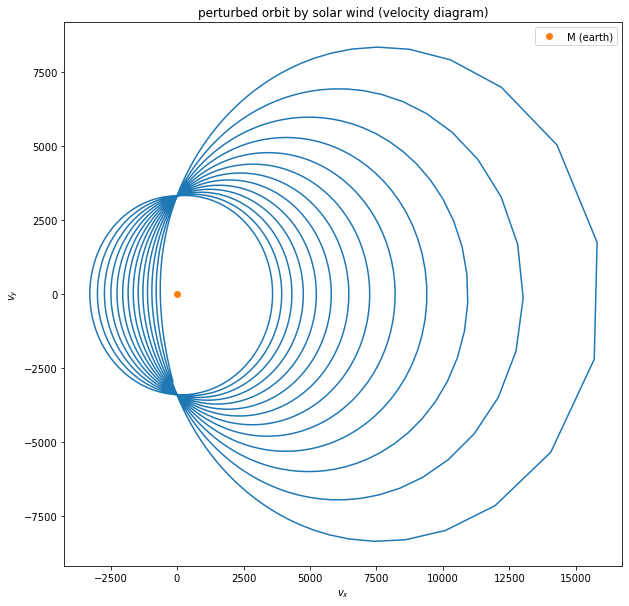

In [8]:
#plotting y vs x (aka solution of the first eq in the 2nd system vs solution of the first eq in the 1st system)
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by solar wind (position diagram)")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(w[0,:],W[0,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show() 
#plotting velocities 
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by solar wind (velocity diagram)")
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.plot(w[1,:],W[1,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show() 

Angular momentum:

$L=L_z=(r \times m v)_z=m(xv_y-yv_x)$

Total energy:

$E=\frac{1}{2}mv^2-\frac{GMm}{r}$

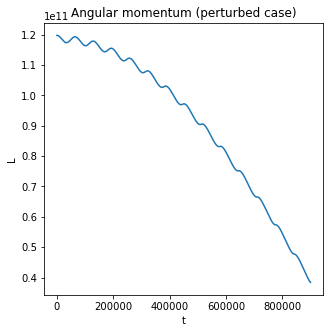

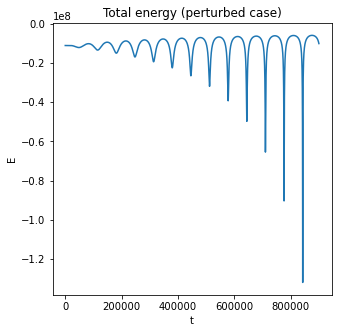

In [9]:

#plotting L/m (angular momentum) and E/m (total energy) as functions of time
#for perturbed case

L=np.zeros(N+1)
E=np.zeros(N+1)
for i in range(0,N+1):
    L[i]=(w[0,i]*W[1,i]-W[0,i]*w[1,i])
    E[i]=(1/2)*((w[1,i]**2+W[1,i]**2)**(1/2))-(G*M/((w[0,i]**2+W[0,i]**2)**(1/2)))
    
plt.figure(figsize=(5,5))
plt.title("Angular momentum (perturbed case)")
plt.xlabel('t')
plt.ylabel('L')
plt.plot(t,L,'-')
plt.show() 

plt.figure(figsize=(5,5))
plt.title("Total energy (perturbed case)")
plt.xlabel('t')
plt.ylabel('E')
plt.plot(t,E,'-')
plt.show() 

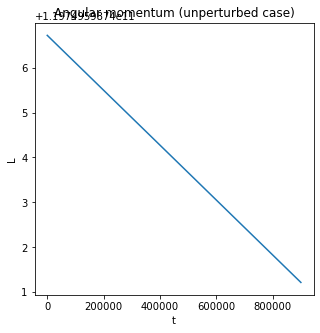

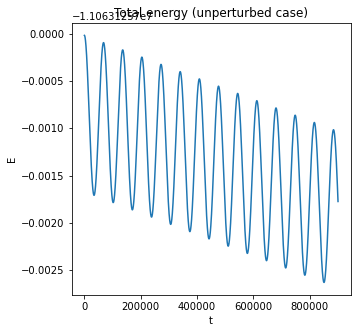

In [10]:

#plotting L/m (angular momentum) and E/m (total energy) as functions of time
#for unperturbed case
L=np.zeros(N+1)
E=np.zeros(N+1)
for i in range(0,N+1):
    L[i]=(w0[0,i]*W0[1,i]-W0[0,i]*w0[1,i])
    E[i]=(1/2)*((w0[1,i]**2+W0[1,i]**2)**(1/2))-(G*M/((w0[0,i]**2+W0[0,i]**2)**(1/2)))
    
plt.figure(figsize=(5,5))
plt.title("Angular momentum (unperturbed case)")
plt.xlabel('t')
plt.ylabel('L')
plt.plot(t,L,'-')
plt.show() 

plt.figure(figsize=(5,5))
plt.title("Total energy (unperturbed case)")
plt.xlabel('t')
plt.ylabel('E')
plt.plot(t,E,'-')
plt.show() 

6.conclusions:

From the plots, we can see that the orbit elongates perpendicular to the perturbing force's direction. We assumed wind to be in $+\hat{i}$ direction and the elongation is occuring in the y direction. This is a complete suprise to me. 

[answer to a] Before doing the simulation, I thought that the orbit will be elongated in x direction as the perturbing force is acting to the right. Also I didn't think that the effect could be this large as we assumed the size of the wind to be only 1% of the gravitational force in the circular orbit (initial condition).

[answer to b] From the simulation, we can see that the perturbed case is indeed elongated in y direction rather than x, this is the opposite of what I expected. So the eccentricity (e) of the orbit is increasing as the time passes. Also we can see from the graph that the effect is quite large eventhough Wind size is quite small.

[answer to c] I've plotted both L (angular momentum) and E (total energy) as functions of time. They both seem to be periodic. initially angular momentum is $L_0=|r_0||v_0|$ as time passes L decreases and tends more and more to zero as the orbit elongates more and more in y direction and hence the forcecenter(earth) will be farther and farther away for the majority of the trajectory, so the motion will be slower.

[answer to d] When satellite is in earth's shadow , Windsize=0 and hence the orbit is circular, I also plotted this unperturbed case the orbit won't elongate as time passes as only gravitational force is acting on the satellite. So the orbit will stay circular in this case.

[answer to e] if the unperturbed orbit was a long ellipse aligned with the wind instead of being circular, the initial condition would be different but the effect of adding a solar wind would be similar to before and that is that the orbit would elongate in a direction perpendicular to the direction of the wind. So, I'd expect to see that the orbit becomes more circular (less eccentricity) as the motion goes on.

[answer to f] if Wind is turned on slowly, I guess that the effect would be smaller in the first orbits and gets larger as Wind increases so I expect the separation of the orbits to get larger as time passes in this case.

Below we can see that 0.1 of the original wind size results in much less elongation.


In [11]:
#less elongated orbit using 0.1*original wind size
a=0
b=900000
N=10000
(t1,w1,W1)=RKSystem(a,b,2,N,[rzero,0],[0,vzero(G,M,rzero)],[f1,f2],[g1,g2],0.1*Wind(G,M,rzero))

t           x(t)          y(t)
90.00000 35998756.46323 299370.54634
180.00000 35995025.93916 598720.38984
270.00000 35988808.68656 898028.82914
360.00000 35980105.13667 1197275.16574
450.00000 35968915.89317 1496438.70548
540.00000 35955241.73219 1795498.75997
630.00000 35939083.60217 2094434.64805
720.00000 35920442.62387 2393225.69723
810.00000 35899320.09024 2691851.24511
900.00000 35875717.46635 2990290.64085
990.00000 35849636.38929 3288523.24659
1080.00000 35821078.66804 3586528.43890
1170.00000 35790046.28335 3884285.61022
1260.00000 35756541.38757 4181774.17029
1350.00000 35720566.30456 4478973.54760
1440.00000 35682123.52946 4775863.19079
1530.00000 35641215.72855 5072422.57013
1620.00000 35597845.73904 5368631.17893
1710.00000 35552016.56889 5664468.53495
1800.00000 35503731.39657 5959914.18187
1890.00000 35452993.57086 6254947.69068
1980.00000 35399806.61058 6549548.66111
2070.00000 35344174.20438 6843696.72309
2160.00000 35286100.21044 7137371.53809
2250.00000 35225588.6562

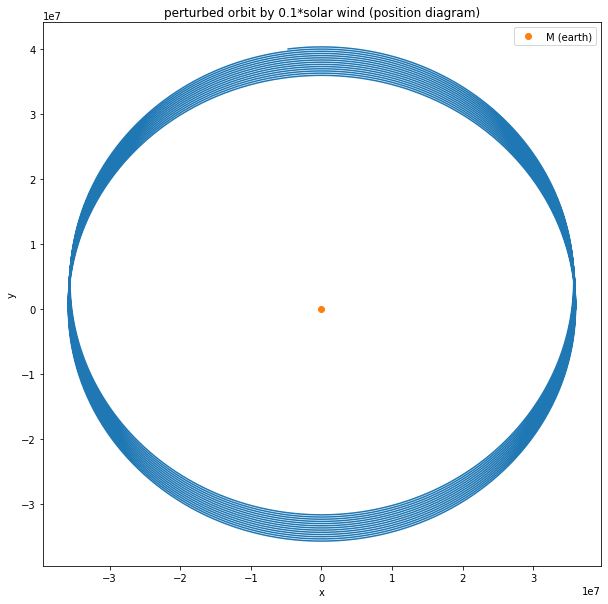

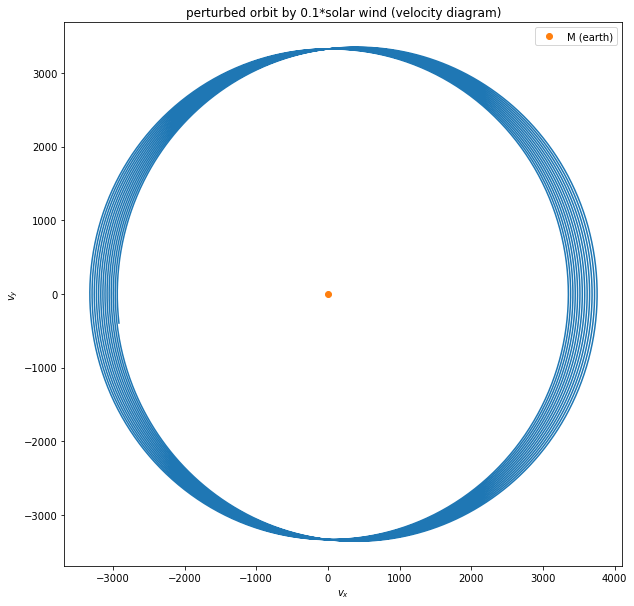

In [12]:
#plotting y vs x (aka solution of the first eq in the 2nd system vs solution of the first eq in the 1st system)
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by 0.1*solar wind (position diagram)")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(w1[0,:],W1[0,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show() 
#plotting velocities 
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by 0.1*solar wind (velocity diagram)")
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.plot(w1[1,:],W1[1,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show()

The resonance theory implies that the resonant effect should disappear if the driving frequency fiffers from the natrual radial frequency. This is the case for all forces except inverse square, so if we change the exponent of r slightly from -2 to -1.9, the effect is strongly altered. Which I've tried below:





In [13]:
#new funcs if we change the exponent very slightly

#1st system of equation: x component of the motion 
#RHS of the equations I described above like du_1/dt=f1(t,u_1,u_2,,w)
def f11(t,u,s,Wind):
    return u[1]
def f21(t,u,s,Wind):
    return ((-G*M/((u[0]**2+s[0]**2)**(2.9/2)))*u[0])+Wind

#2nd system of equation: y component of the motion 
def g11(t,u,s,Wind):
    return s[1]
def g21(t,u,s,Wind):
    return (-G*M/((u[0]**2+s[0]**2)**(2.9/2)))*s[0]

In [14]:
#less elongated orbit using 0.1*original wind size
a=0
b=900000
N=10000
(t2,w2,W2)=RKSystem(a,b,2,N,[rzero,0],[0,vzero(G,M,rzero)],[f11,f21],[g11,g21],Wind(G,M,rzero))

t           x(t)          y(t)
90.00000 35992920.82405 299354.33760
180.00000 35971679.41780 598590.66191
270.00000 35936264.13412 897590.67290
360.00000 35886655.52223 1196235.49523
450.00000 35822826.26899 1494405.38592
540.00000 35744741.11617 1791979.43632
630.00000 35652356.75308 2088835.26641
720.00000 35545621.68367 2384848.70931
810.00000 35424476.06731 2679893.48379
900.00000 35288851.53183 2973840.85240
990.00000 35138670.95764 3266559.26252
1080.00000 34973848.23104 3557913.96780
1170.00000 34794287.96501 3847766.62658
1260.00000 34599885.18509 4135974.87420
1350.00000 34390524.97785 4422391.86512
1440.00000 34166082.09908 4706865.78094
1530.00000 33926420.53833 4989239.29924
1620.00000 33671393.03593 5269349.01818
1710.00000 33400840.54832 5547024.83050
1800.00000 33114591.65663 5822089.24020
1890.00000 32812461.91297 6094356.61373
1980.00000 32494253.11803 6363632.35679
2070.00000 32159752.52262 6629712.00597
2160.00000 31808731.94494 6892380.22319
2250.00000 31440946.7939

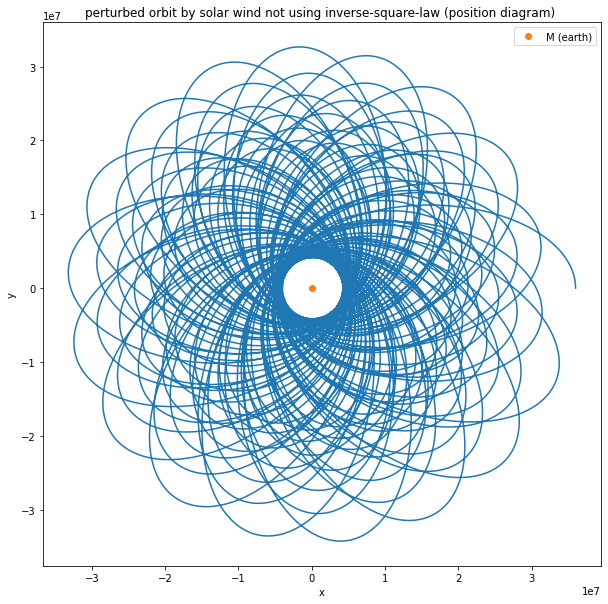

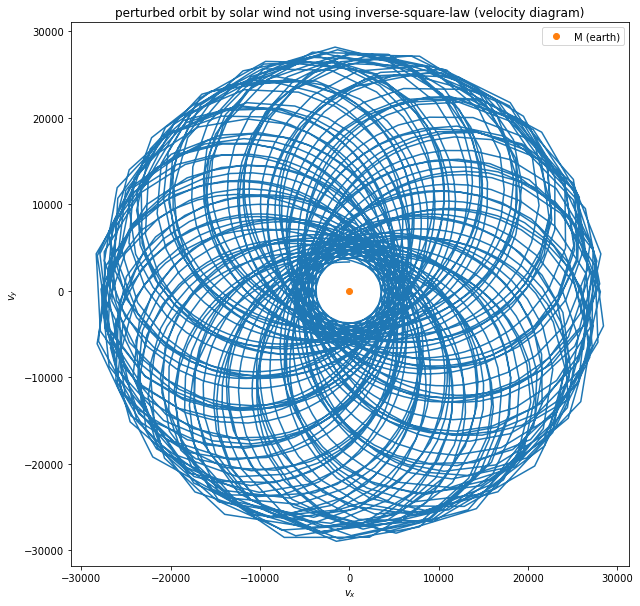

In [15]:
#plotting y vs x (aka solution of the first eq in the 2nd system vs solution of the first eq in the 1st system)
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by solar wind not using inverse-square-law (position diagram) ")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(w2[0,:],W2[0,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show() 
#plotting velocities 
plt.figure(figsize=(10,10))
plt.title("perturbed orbit by solar wind not using inverse-square-law (velocity diagram)")
plt.xlabel('$v_x$')
plt.ylabel('$v_y$')
plt.plot(w2[1,:],W2[1,:],'-')
plt.plot(0,0,"o",label='M (earth)')
plt.legend()
plt.show()

This seemingly simple problem can become a challenge when rzero becomes small. This stems from the very singular nature of the gravitational potential which diverges as $1/r$ as the distance between the masses, $r$ , becomes small. When the small mass approaches close from the heavy mass, the gravitational field can cause extremely large curvature in its orbit. Said in another way, the orbits possessing high ellipticity will likely be hard to compute numerically, even when using a method as accurate as the Runge-Kutta 4th order scheme.

Refrences:

1.
Arthur W. Luehrmann, “Orbits in the solar wind – a mini-research problem,” Am. J. Phys.
42, 361 (1974). Luehrmann emphasizes the desirability of student problems requiring
inductive rather than deductive reasoning.

2.
An Introduction to Computer Simulation Methods
Applications to Physical System / Harvey Gould, Jan Tobochnik, andWolfgang Christian / August 27, 2016